# Google Play store apps Data analysis and Data Modelling

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report


In [2]:
df=pd.read_csv("Google-Playstore.csv")

In [3]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

# Data Exploration

In [4]:
df.shape

(2312944, 24)

In [5]:
df.info

<bound method DataFrame.info of                                                   App Name  \
0                                                  Gakondo   
1                                      Ampere Battery Info   
2                                                   Vibook   
3        Smart City Trichy Public Service Vehicles 17UC...   
4                                                  GROW.me   
...                                                    ...   
2312939                                           大俠客—熱血歸來   
2312940                                         ORU Online   
2312941                                     Data Structure   
2312942                                        Devi Suktam   
2312943                       Biliyor Musun - Sonsuz Yarış   

                                       App Id       Category  Rating  \
0                         com.ishakwe.gakondo      Adventure     0.0   
1                  com.webserveis.batteryinfo          Tools     4.4   
2      

In [6]:
df.head(10)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
5,IMOCCI,com.imocci,Social,0.0,0.0,50+,50.0,89,True,0.0,...,http://www.imocci.com,info@imocci.com,"Dec 24, 2018","Dec 20, 2019",Teen,https://www.imocci.com/wp-content/uploads/2018...,False,True,False,2021-06-15 20:19:35
6,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,Libraries & Demo,4.5,12.0,"1,000+",1000.0,2567,True,0.0,...,NaN,aitomgharfatimezzahra@gmail.com,"Sep 23, 2019","Sep 27, 2019",Everyone,https://sites.google.com/view/unlimited4gdatap...,True,False,False,2021-06-15 20:19:35
7,The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.0,39.0,500+,500.0,702,True,0.0,...,NaN,elementuser03@gmail.com,"Jun 21, 2019","Jun 21, 2019",Everyone,https://www.freeprivacypolicy.com/privacy/view...,False,False,False,2021-06-15 20:19:35
8,WhatsOpen,com.whatsopen.app,Communication,0.0,0.0,10+,10.0,18,True,0.0,...,http://yilvermolinah.com,yilver.mh1996@gmail.com,NaN,"Dec 07, 2018",Teen,http://elcafedelamanana.yilvermolinah.com/poli...,False,False,False,2021-06-15 20:19:35
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,"50,000+",50000.0,62433,True,0.0,...,https://trendyteme888-31139.web.app,trendyteme.888@gmail.com,"Sep 22, 2019","Oct 07, 2020",Everyone,http://bit.ly/EmojiThemePro,True,False,False,2021-06-15 20:19:35


In [7]:
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


In [8]:
df.isnull().sum().sort_values(ascending = False)

Developer Website    760835
Privacy Policy       420953
Released              71053
Rating                22883
Rating Count          22883
Minimum Android        6530
Size                    196
Currency                135
Installs                107
Minimum Installs        107
Developer Id             33
Developer Email          31
App Name                  2
App Id                    0
Price                     0
Free                      0
Maximum Installs          0
Last Updated              0
Content Rating            0
Category                  0
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [9]:
# Dropping the columns with null values
df = df.drop(['App Id','Developer Website','Developer Email','Privacy Policy','Currency','Developer Id','Scraped Time','Minimum Android'], axis=1)
df.head()


,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,10M,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,2.9M,"May 21, 2020","May 06, 2021",Everyone,True,False,False
2,Vibook,Productivity,0.0,0.0,50+,50.0,58,True,0.0,3.7M,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10+,10.0,19,True,0.0,1.8M,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False
4,GROW.me,Tools,0.0,0.0,100+,100.0,478,True,0.0,6.2M,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False


In [10]:
df.shape[1] #printing number of features in datasets.zip

16

In [11]:
df.info() #Dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App Name          object 
 1   Category          object 
 2   Rating            float64
 3   Rating Count      float64
 4   Installs          object 
 5   Minimum Installs  float64
 6   Maximum Installs  int64  
 7   Free              bool   
 8   Price             float64
 9   Size              object 
 10  Released          object 
 11  Last Updated      object 
 12  Content Rating    object 
 13  Ad Supported      bool   
 14  In App Purchases  bool   
 15  Editors Choice    bool   
dtypes: bool(4), float64(4), int64(1), object(7)
memory usage: 220.6+ MB


In [12]:
print("Number of rows having null values in the dataset:")
missing_info = (len(df[df.isnull().any(axis=1)]) / len(df) )*100
print(len(df[df.isnull().any(axis=1)]),' which is ' ,round(missing_info,2) , '%')

Number of rows having null values in the dataset:
71263  which is  3.08 %


In [13]:
df.isnull().any() #Checking whether the null values are there or not feature-wise

App Name             True
Category            False
Rating               True
Rating Count         True
Installs             True
Minimum Installs     True
Maximum Installs    False
Free                False
Price               False
Size                 True
Released             True
Last Updated        False
Content Rating      False
Ad Supported        False
In App Purchases    False
Editors Choice      False
dtype: bool

In [14]:
cols = df.columns[df.isnull().any()].to_list()
print(cols) #Columns with null values

for c in cols:
    print(c,type(c),": ",df[c].isnull().sum()) # count of null values in each column

['App Name', 'Rating', 'Rating Count', 'Installs', 'Minimum Installs', 'Size', 'Released']
App Name <class 'str'> :  2
Rating <class 'str'> :  22883
Rating Count <class 'str'> :  22883
Installs <class 'str'> :  107
Minimum Installs <class 'str'> :  107
Size <class 'str'> :  196
Released <class 'str'> :  71053


In [15]:
df.dropna(subset=['Size','Minimum Installs','Installs','App Name'],inplace=True)
#df.dropna(subset=['App Name'],inplace=True)

In [16]:
for c in cols:
    print(c,type(c),": ",df[c].isnull().sum())

App Name <class 'str'> :  0
Rating <class 'str'> :  22581
Rating Count <class 'str'> :  22581
Installs <class 'str'> :  0
Minimum Installs <class 'str'> :  0
Size <class 'str'> :  0
Released <class 'str'> :  70758


In [17]:
df['Rating'] #

0          0.0
1          4.4
2          0.0
3          5.0
4          0.0
          ... 
2312939    4.3
2312940    0.0
2312941    0.0
2312942    3.5
2312943    5.0
Name: Rating, Length: 2312640, dtype: float64

In [18]:
df['Rating']  = df['Rating'].astype(float) #changing data type from string to float
avg = round(df['Rating'].mean(),1)
df['Rating'].fillna(avg,inplace=True)


df['Rating Count']  = df['Rating Count'].astype(float) #changing data type from string to float
avg = round(df['Rating Count'].mean(),1)
df['Rating Count'].fillna(avg,inplace=True)
print(df['Rating'])
print(df['Rating Count'])

0          0.0
1          4.4
2          0.0
3          5.0
4          0.0
          ... 
2312939    4.3
2312940    0.0
2312941    0.0
2312942    3.5
2312943    5.0
Name: Rating, Length: 2312640, dtype: float64
0              0.0
1             64.0
2              0.0
3              5.0
4              0.0
            ...   
2312939    16775.0
2312940        0.0
2312941        0.0
2312942        8.0
2312943       12.0
Name: Rating Count, Length: 2312640, dtype: float64


In [19]:
df['Content Rating'].value_counts()

Everyone           2021869
Teen                196318
Mature 17+           60280
Everyone 10+         33883
Unrated                154
Adults only 18+        136
Name: Content Rating, dtype: int64

In [20]:
df['Content Rating'] = df['Content Rating'].replace('Unrated',"Everyone")

#Cleaning other values just to include Everyone, Teens and Adult 

df['Content Rating'] = df['Content Rating'].replace('Mature 17+',"Adults")
df['Content Rating'] = df['Content Rating'].replace('Adults only 18+',"Adults")
df['Content Rating'] = df['Content Rating'].replace('Everyone 10+',"Everyone")

In [21]:
#df["Content Rating"].unique()

In [22]:
# CLeaning the Installs column so as to convert it into numeric
df.Installs = df.Installs.str.replace(',','')
df.Installs = df.Installs.str.replace('+','')
df.Installs = df.Installs.str.replace('Free','0')
df['Installs'] = pd.to_numeric(df['Installs'])

C:\Users\KRISHN~1\AppData\Local\Temp/ipykernel_25068/3969102161.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.Installs = df.Installs.str.replace('+','')


In [23]:
#df['Installs']

In [24]:
df['PriceRange'] = pd.cut(df['Price'],bins=[0,0.19,9.99,29.99,410],labels=['Free','Low','Mid','High'],include_lowest=True)
#dummies = pd.get_dummies(df['PriceRange'],prefix='Price')
#df = df.join(dummies)
df['PriceRange'].value_counts()

Free    2267708
Low       41968
Mid        2092
High        872
Name: PriceRange, dtype: int64

In [25]:
print(df.Free.value_counts()) #Combined count of apps which are Free and not Free
print("Apps that have Price = 0, have Free column True")
df.loc[(df.Price==0) & (df.Free==False),'Free'] = True
print(df.Free.value_counts())

True     2267680
False      44960
Name: Free, dtype: int64
Apps that have Price = 0, have Free column True
True     2267708
False      44932
Name: Free, dtype: int64


In [26]:
df['Type'] = np.where(df['Free'] == True,'Free','Paid')
df.drop(['Free'],inplace=True,axis=1)

In [27]:
df['RatingType'] = 'NoRating'
df.loc[(df['Rating Count'] > 0) & (df['Rating Count'] <= 10000.0),'RatingType'] = 'Less than 10K'
df.loc[(df['Rating Count'] > 10000) & (df['Rating Count'] <= 500000.0),'RatingType'] = 'Between 10K and 500K'
df.loc[(df['Rating Count'] > 500000) & (df['Rating Count'] <= 138557570.0),'RatingType'] = 'More than 500K'
df.RatingType.value_counts()

Less than 10K           1215434
NoRating                1059762
Between 10K and 500K      35779
More than 500K             1665
Name: RatingType, dtype: int64

# Data Viz.

c:\users\krishna sai\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


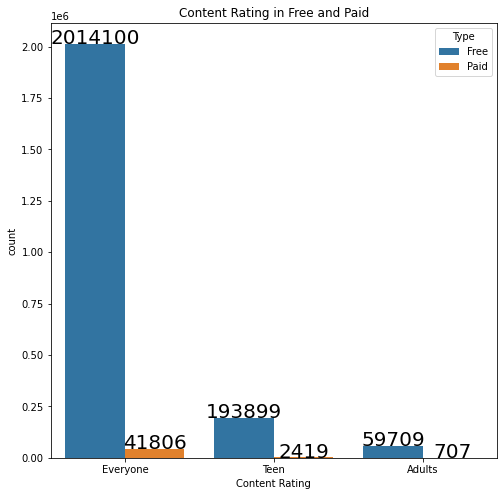

In [28]:
plt.figure(figsize=(8,8))
ax = sns.countplot(df['Content Rating'],hue=df['Type']);
plt.title("Content Rating in Free and Paid")

for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 20)
    
plt.show()

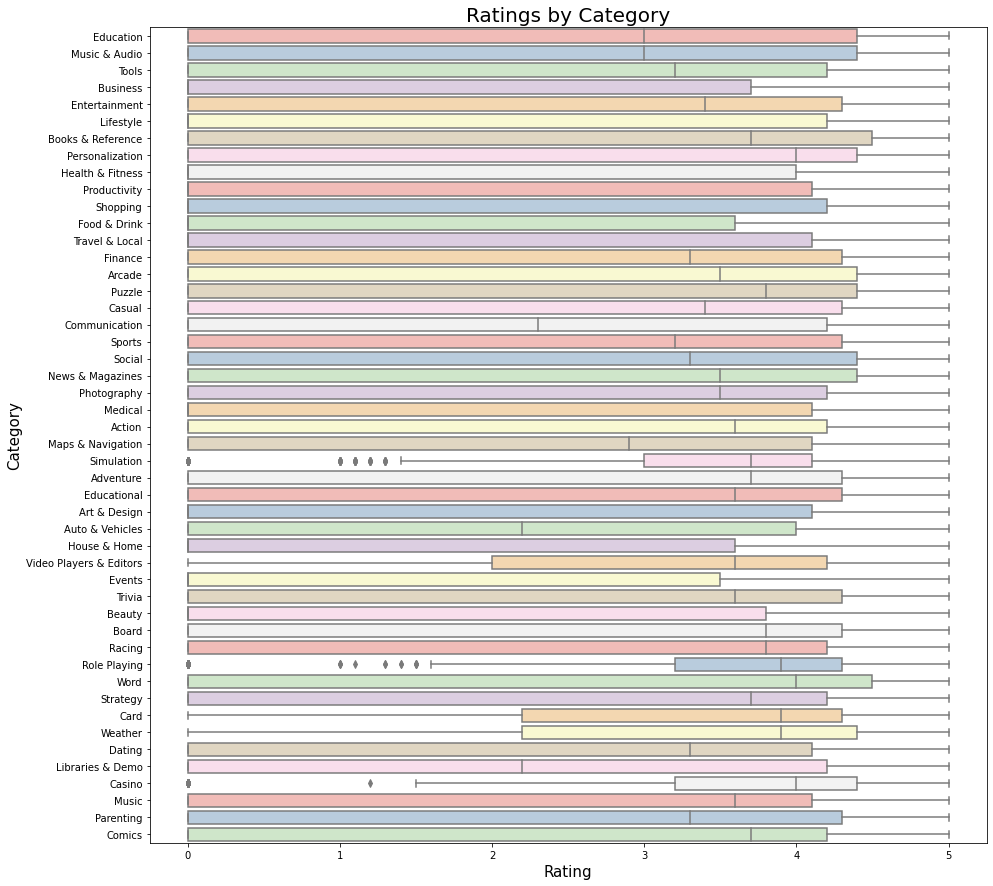

In [29]:
f, ax = plt.subplots(figsize=(15, 15))
# Box plot to map rating among various categories
sns.boxplot(x="Rating", y="Category", data=df,palette="Pastel1",order = df['Category'].value_counts().index)
plt.title("Ratings by Category", fontsize = '20')
plt.ylabel('Category',fontsize = '15')
plt.xlabel('Rating',fontsize = '15');

c:\users\krishna sai\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


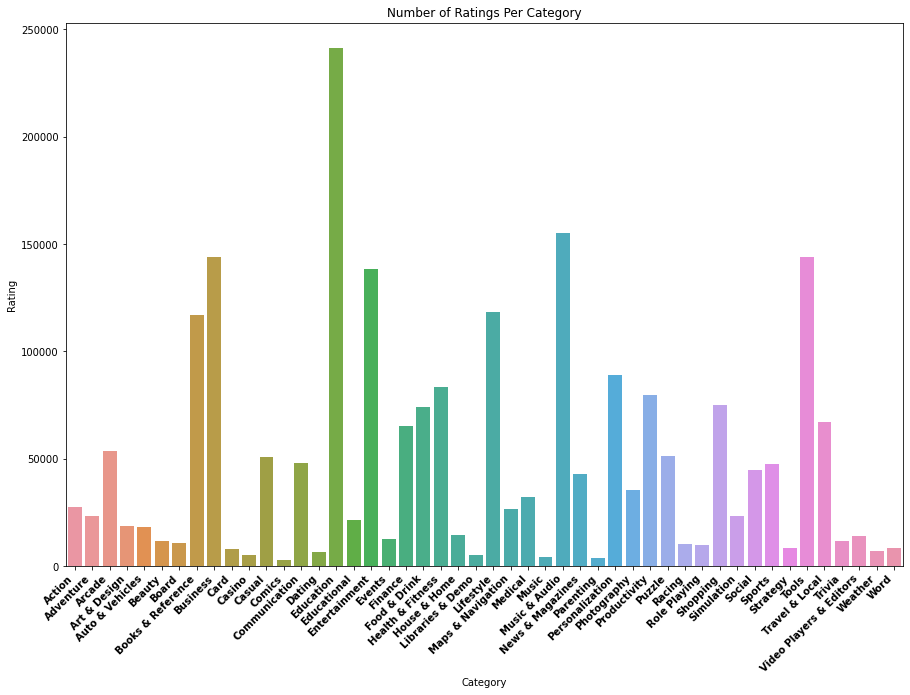

In [30]:
category_rating = df.groupby(['Category'])['Rating Count'].count()

plt.figure(figsize=(15,10))
sns.barplot(category_rating.index, category_rating.values)
plt.title('Number of Ratings Per Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(fontsize=10,fontweight='bold',rotation=45,ha='right');

### Education, Music & Audio, Tools, Entertainment and Business category applications are highly rated applications

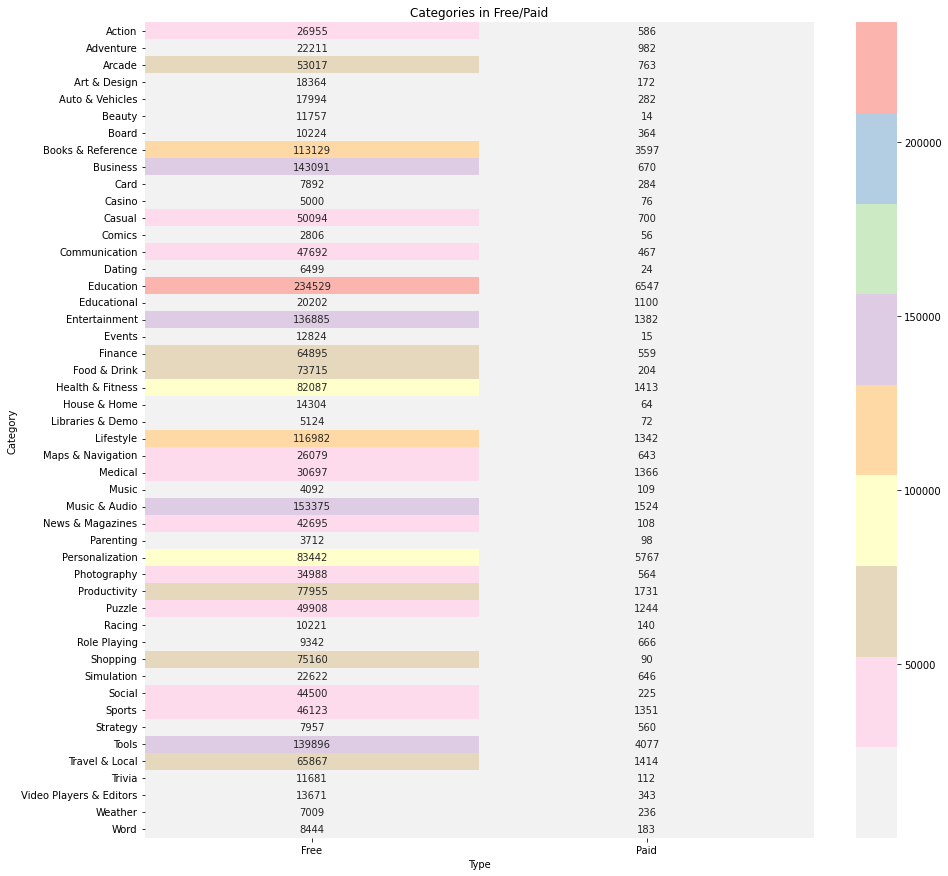

In [31]:
plt.figure(figsize=(15,15))
plt.title("Categories in Free/Paid")
sns.heatmap(pd.crosstab(df['Category'], df["Type"]),annot=True,fmt='g', cmap="Pastel1_r")
plt.show()

In [32]:
m = df['Rating Count'].max()
df[df['Rating Count']==m]

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Size,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,PriceRange,Type,RatingType
385470,WhatsApp Messenger,Communication,4.0,138557570.0,5000000000,5.000000e+09,6265637751,0.0,Varies with device,"Oct 18, 2010","Jun 09, 2021",Everyone,False,False,True,Free,Free,More than 500K


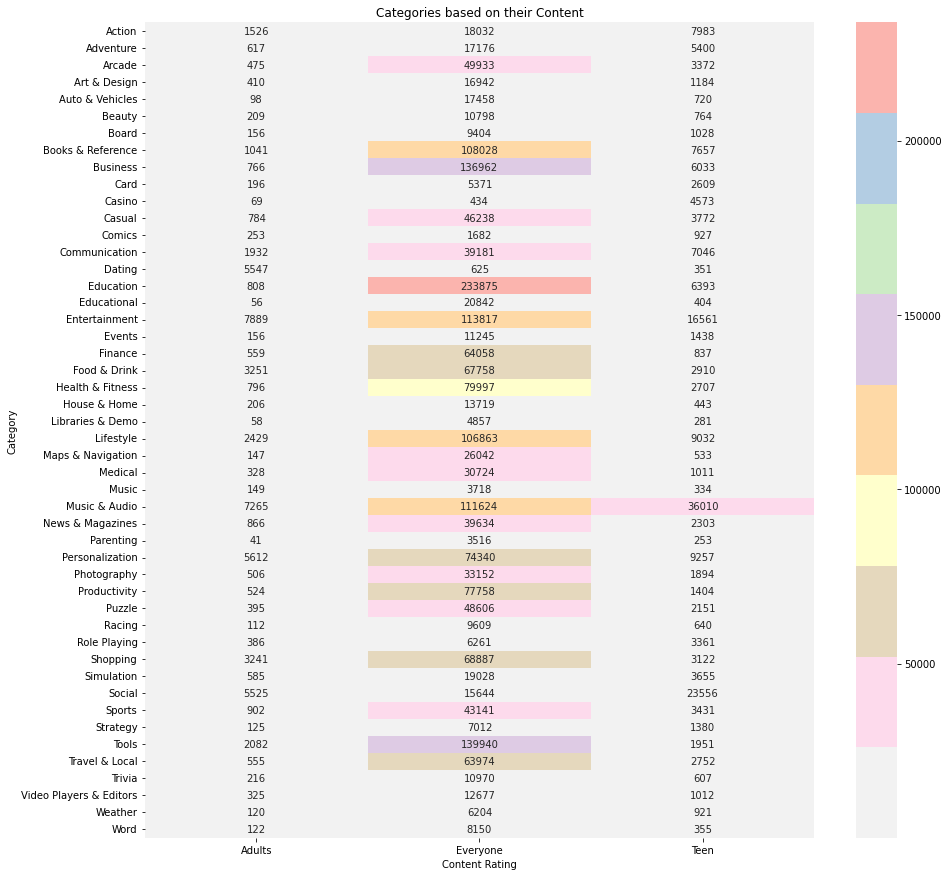

In [33]:
plt.figure(figsize=(15,15))
plt.title("Categories based on their Content")
sns.heatmap(pd.crosstab(df['Category'], df["Content Rating"]),annot=True,fmt='g', cmap="Pastel1_r");
plt.show()

c:\users\krishna sai\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


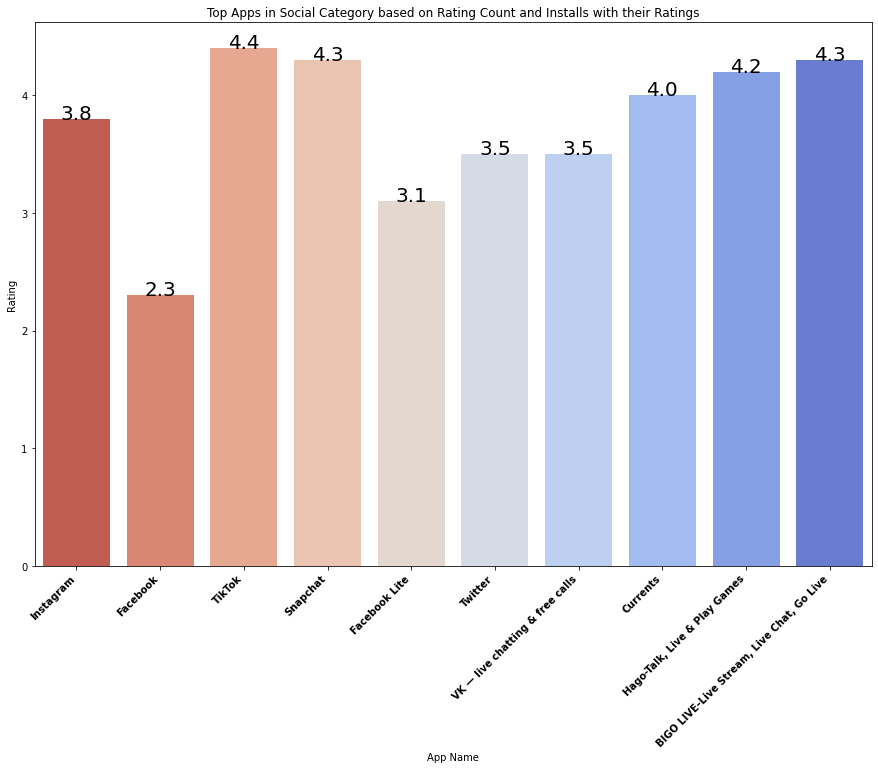

In [34]:
df_e = df.loc[(df['Installs'] > 1000000) & (df['Rating Count'] > 1000000) & (df.Category == "Social")]

df_e = df_e.sort_values(by=['Rating Count'],ascending=False).head(10)

plt.figure(figsize=(15,10))

ax = sns.barplot(df_e['App Name'], df_e['Rating'],palette='coolwarm_r')#'Set3_r')
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 20)
plt.title("Top Apps in Social Category based on Rating Count and Installs with their Ratings")
plt.xticks(fontsize=10,fontweight='bold',rotation=45,ha='right');
plt.show()

c:\users\krishna sai\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


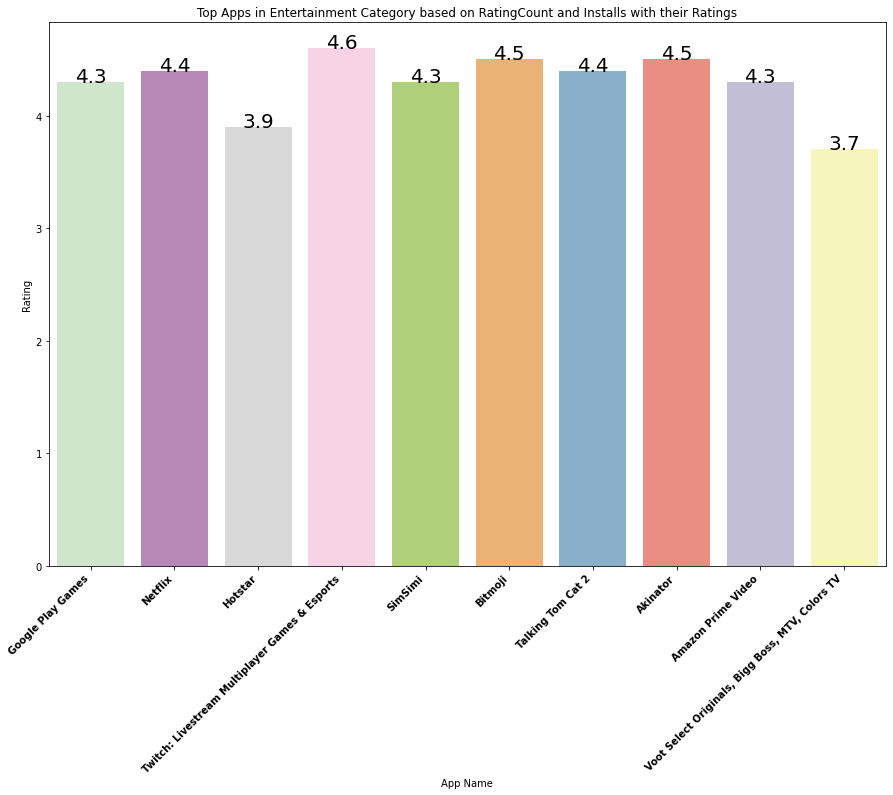

In [35]:
df_e = df.loc[(df['Installs'] > 1000000) & (df['Rating Count'] > 1000000) & (df['Category'] == "Entertainment")]

df_e = df_e.sort_values(by=['Rating Count'],ascending=False).head(10)

plt.figure(figsize=(15,10))

ax = sns.barplot(df_e['App Name'], df_e['Rating'], palette='Set3_r')
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 20)
plt.title("Top Apps in Entertainment Category based on RatingCount and Installs with their Ratings")
plt.xticks(fontsize=10,fontweight='bold',rotation=45,ha='right');
plt.show()


c:\users\krishna sai\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


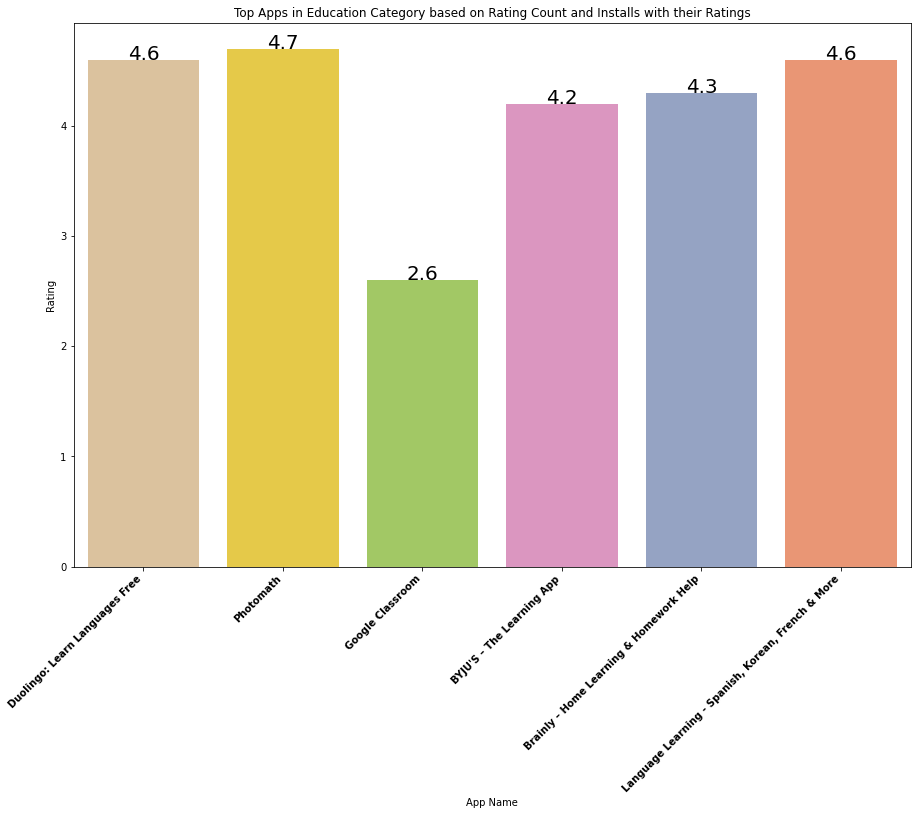

In [36]:
df_e = df.loc[(df['Installs'] > 1000000) & (df['Rating Count'] > 1000000) & (df['Category'] == "Education")]

df_e = df_e.sort_values(by=['Rating Count'],ascending=False).head(10)

plt.figure(figsize=(15,10))

ax = sns.barplot(df_e['App Name'], df_e['Rating'], palette='Set2_r')
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 20)
plt.title("Top Apps in Education Category based on Rating Count and Installs with their Ratings")
plt.xticks(fontsize=10,fontweight='bold',rotation=45,ha='right');
plt.show()

c:\users\krishna sai\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


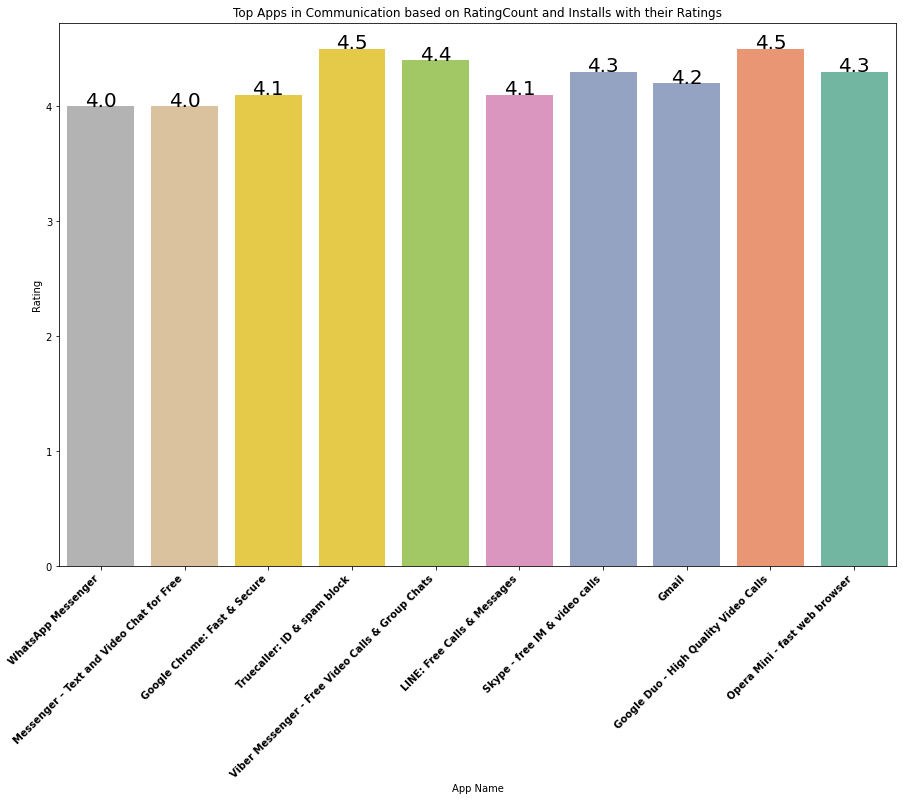

In [37]:
df_e = df.loc[(df['Installs'] > 1000000) & (df['Rating Count'] > 1000000) & (df['Category'] == "Communication")]

df_e = df_e.sort_values(by=['Rating Count'],ascending=False).head(10)

plt.figure(figsize=(15,10))

ax = sns.barplot(df_e['App Name'], df_e['Rating'], palette='Set2_r')
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 20)
plt.title("Top Apps in Communication based on RatingCount and Installs with their Ratings")
plt.xticks(fontsize=10,fontweight='bold',rotation=45,ha='right');
plt.show()

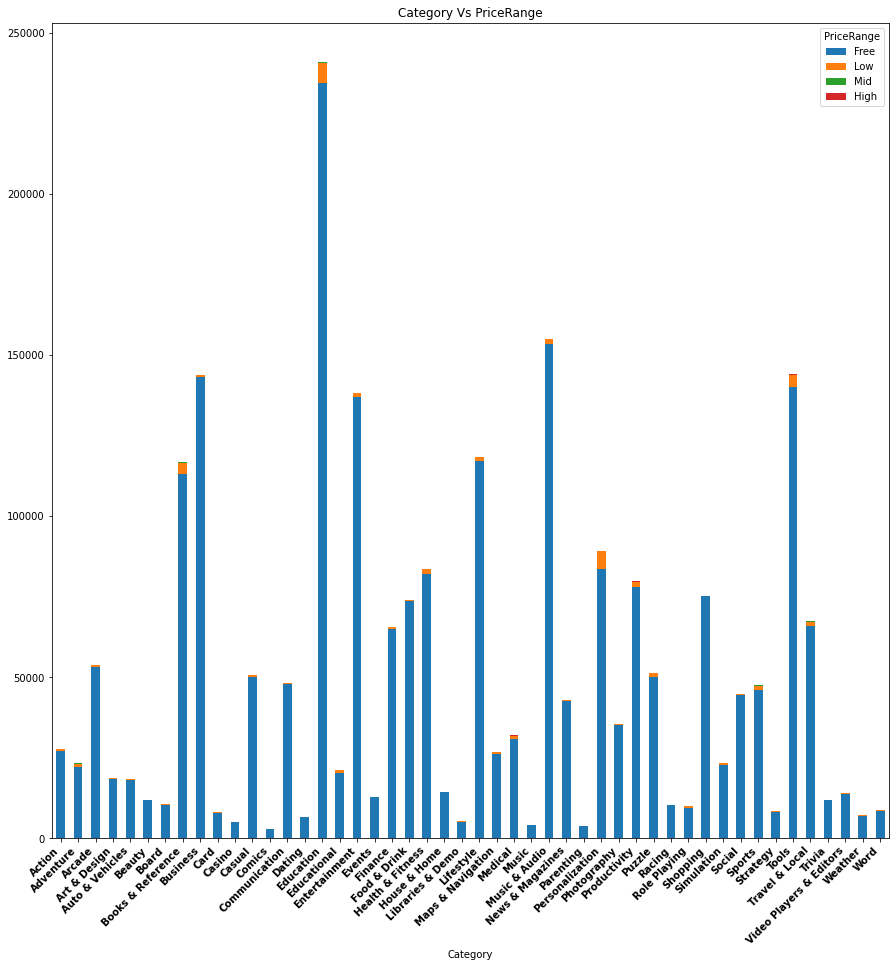

In [38]:
x = pd.crosstab(df['Category'],df['PriceRange'])
x.plot(kind='bar',stacked=True,figsize=(15,15))
plt.title("Category Vs PriceRange")
plt.xticks(fontsize=10,fontweight='bold',rotation=45,ha='right');

# Data Modeling 

In [39]:
#Selected features
df['Category'] = pd.factorize(df['Category'])[0].astype(int)
df['Type'] = pd.factorize(df['Type'])[0].astype(int)
df['Content Rating'] = pd.factorize(df['Content Rating'])[0].astype(int)
df['Ad Supported'] = pd.factorize(df['Ad Supported'])[0].astype(int)
df['Editors Choice'] = pd.factorize(df['Editors Choice'])[0].astype(int)
df['In App Purchases'] = pd.factorize(df['In App Purchases'])[0].astype(int)
df['RatingType'] = pd.factorize(df['RatingType'])[0].astype(int)
df['PriceRange'] = pd.factorize(df['PriceRange'])[0].astype(int)

In [40]:
#dropping other columns which are not taken into consideration for predicting rating
X = df.drop(['App Name','Size', 'Minimum Installs', 'Released','Rating Count' ,'Type','Maximum Installs','Price','Last Updated','Rating','RatingType'],axis=1)
#Target values
y = df['RatingType'].values

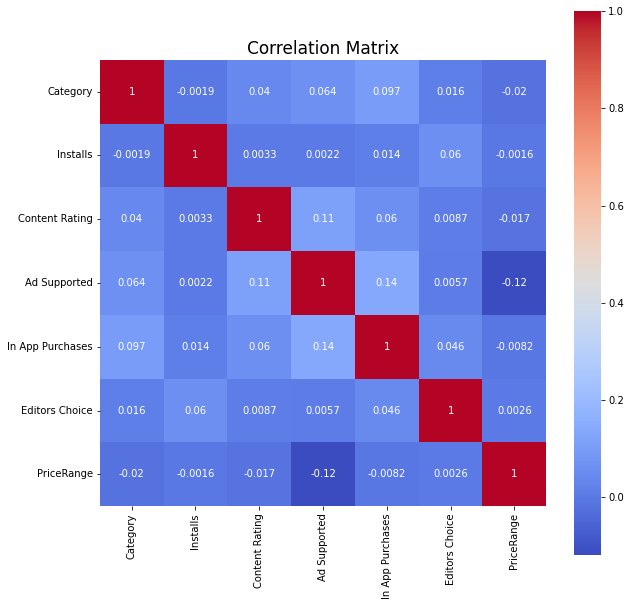

In [41]:
corr = X.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap="coolwarm",square=True, annot=True)
plt.title("Correlation Matrix", fontsize = '17');

In [42]:
scaler = StandardScaler()
X['Installs'] = scaler.fit_transform(X[['Installs']])

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=20)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1618848, 7), (693792, 7), (1618848,), (693792,))

Accuracy = 84.34 %


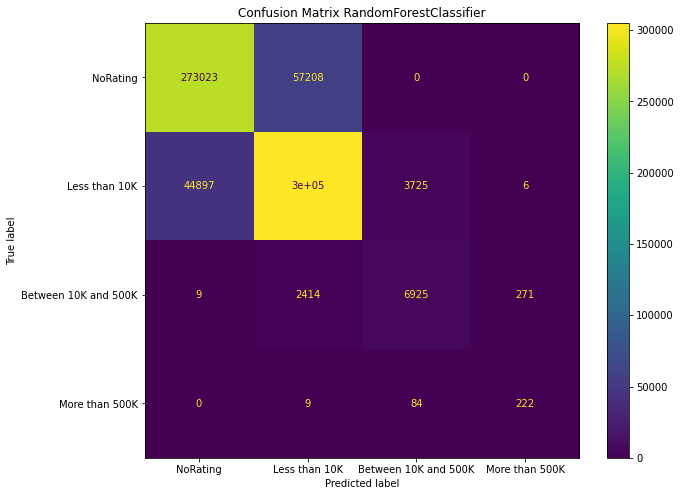

In [44]:
# A simple RandomForestClassifier with parameter tuning
rf_model = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_pred,y_test)*100
print("Accuracy =",round(rf_acc,2),"%")
cm = confusion_matrix(y_pred,y_test)
cmd = ConfusionMatrixDisplay(cm,display_labels =['NoRating','Less than 10K','Between 10K and 500K','More than 500K'])
fig, ax = plt.subplots(figsize=(10,8));
plt.title("Confusion Matrix RandomForestClassifier")
cmd.plot(ax=ax);

In [45]:
target_names = ['NoRating','Less than 10K','Between 10K and 500K','More than 500K']
cr = classification_report(y_test,y_pred,target_names = target_names)
print("Classification Report for RandomForestClassifier")
print(cr)

Classification Report for RandomForestClassifier
                      precision    recall  f1-score   support

            NoRating       0.83      0.86      0.84    317929
       Less than 10K       0.86      0.84      0.85    364630
Between 10K and 500K       0.72      0.65      0.68     10734
      More than 500K       0.70      0.44      0.55       499

            accuracy                           0.84    693792
           macro avg       0.78      0.70      0.73    693792
        weighted avg       0.84      0.84      0.84    693792



 ## Gradient Boodsting Classifier

Accuracy = 83.45 %


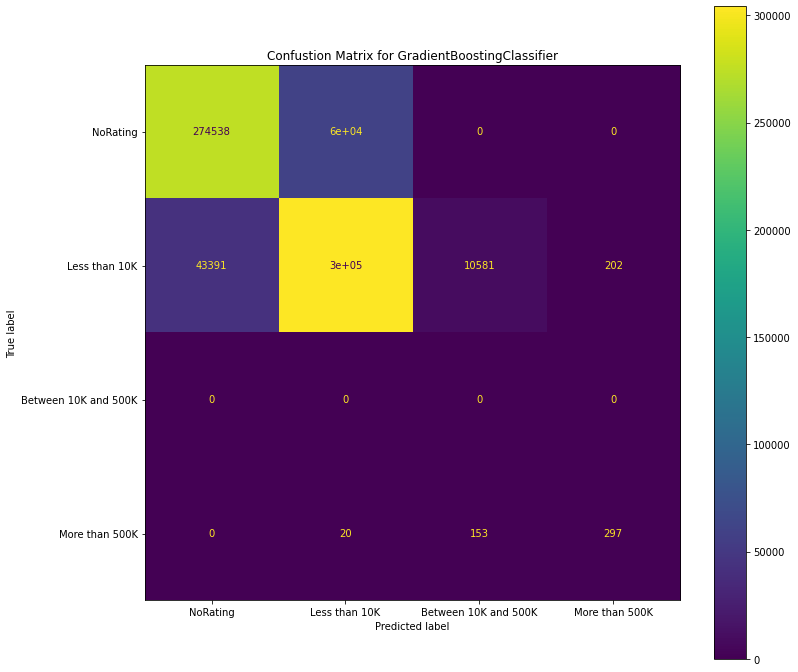

In [46]:
###
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb_model.fit(X_train,y_train)
y_pred = gb_model.predict(X_test)
gb_acc = accuracy_score(y_pred,y_test)*100
print("Accuracy =",round(gb_acc,2),"%")
cm = confusion_matrix(y_pred,y_test)
cmd = ConfusionMatrixDisplay(cm,display_labels =['NoRating','Less than 10K','Between 10K and 500K','More than 500K'])
fig_1, ax_1 = plt.subplots(figsize=(12,12));
plt.title("Confustion Matrix for GradientBoostingClassifier")
cmd.plot(ax=ax_1);
###

In [47]:
target_names = ['NoRating','Less than 10K','Between 10K and 500K','More than 500K']
cr = classification_report(y_test,y_pred,target_names = target_names)
print("Classification Report for GradientBoostingClassifier")
print(cr)

c:\users\krishna sai\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for GradientBoostingClassifier
                      precision    recall  f1-score   support

            NoRating       0.82      0.86      0.84    317929
       Less than 10K       0.85      0.83      0.84    364630
Between 10K and 500K       0.00      0.00      0.00     10734
      More than 500K       0.63      0.60      0.61       499

            accuracy                           0.83    693792
           macro avg       0.58      0.57      0.57    693792
        weighted avg       0.82      0.83      0.83    693792



c:\users\krishna sai\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\krishna sai\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## XGBoost Classifier

In [48]:
from xgboost import XGBClassifier

In [49]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

c:\users\krishna sai\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:41:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [50]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [51]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
target_names = ['NoRating','Less than 10K','Between 10K and 500K','More than 500K']
cr = classification_report(y_test,y_pred,target_names = target_names)
print("Classification Report for XGBoostClassifier")
print(cr)

Accuracy: 84.36%
Classification Report for XGBoostClassifier
                      precision    recall  f1-score   support

            NoRating       0.83      0.86      0.84    317929
       Less than 10K       0.86      0.83      0.85    364630
Between 10K and 500K       0.72      0.65      0.68     10734
      More than 500K       0.70      0.48      0.57       499

            accuracy                           0.84    693792
           macro avg       0.78      0.71      0.74    693792
        weighted avg       0.84      0.84      0.84    693792



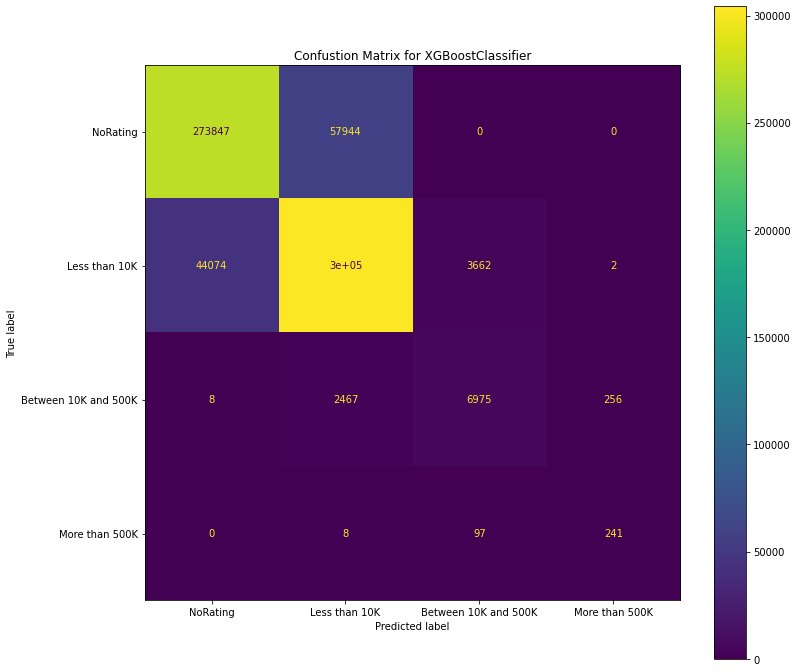

In [52]:
cm = confusion_matrix(y_pred,y_test)

cmd = ConfusionMatrixDisplay(cm,display_labels =['NoRating','Less than 10K','Between 10K and 500K','More than 500K'])
fig_2, ax_2 = plt.subplots(figsize=(12,12));
plt.title("Confustion Matrix for XGBoostClassifier")
cmd.plot(ax=ax_2);

## Perceptron and Multilayer Perceptron

In [53]:
from sklearn.linear_model import Perceptron
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [54]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 295903


In [55]:
print('Accuracy(test set): %.3f' % accuracy_score(y_test, y_pred))
print('Accuracy (standardised test set): %.3f' % ppn.score(X_test_std, y_test))
target_names = ['NoRating','Less than 10K','Between 10K and 500K','More than 500K']
cr = classification_report(y_test,y_pred,target_names = target_names)
print("Classification Report for Perceptron")
print(cr)


Accuracy(test set): 0.573
Accuracy (standardised test set): 0.573
Classification Report for Perceptron
                      precision    recall  f1-score   support

            NoRating       0.56      0.48      0.52    317929
       Less than 10K       0.58      0.67      0.62    364630
Between 10K and 500K       0.28      0.13      0.18     10734
      More than 500K       0.41      0.71      0.52       499

            accuracy                           0.57    693792
           macro avg       0.46      0.50      0.46    693792
        weighted avg       0.57      0.57      0.57    693792



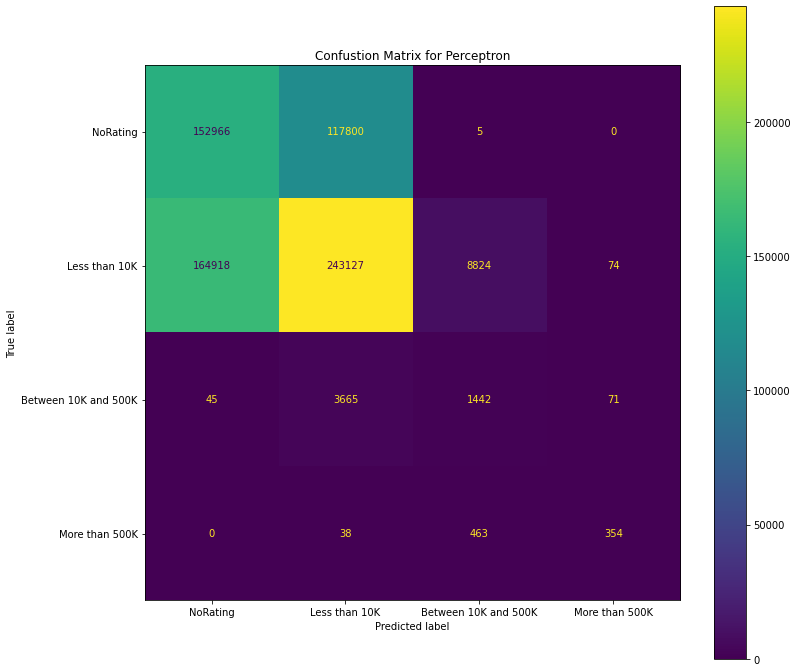

In [56]:
cm = confusion_matrix(y_pred,y_test)

cmd = ConfusionMatrixDisplay(cm,display_labels =['NoRating','Less than 10K','Between 10K and 500K','More than 500K'])
fig_3, ax_3 = plt.subplots(figsize=(12,12));
plt.title("Confustion Matrix for Perceptron")
cmd.plot(ax=ax_3);

In [57]:
#y_pred.shape

In [58]:
from sklearn.neural_network import MLPClassifier
clf1 = MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(5,), max_iter=100)
clf1.fit(X_train, y_train)
clf_predict1 = clf1.predict(X_test)
# Accuracy factors
print('acc for training data: {:.3f}'.format(clf1.score(X_train, y_train)))
print('acc for test data: {:.3f}'.format(clf1.score(X_test, y_test)))
print('MLP Classification report:\n\n', classification_report(y_test, clf_predict1))

c:\users\krishna sai\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


acc for training data: 0.723
acc for test data: 0.722


c:\users\krishna sai\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MLP Classification report:

               precision    recall  f1-score   support

           0       0.64      0.95      0.77    317929
           1       0.91      0.53      0.67    364630
           2       0.71      0.56      0.62     10734
           3       0.00      0.00      0.00       499

    accuracy                           0.72    693792
   macro avg       0.56      0.51      0.51    693792
weighted avg       0.78      0.72      0.71    693792



c:\users\krishna sai\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\krishna sai\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy(test set): 0.722
Accuracy (standardised test set): 0.554


c:\users\krishna sai\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


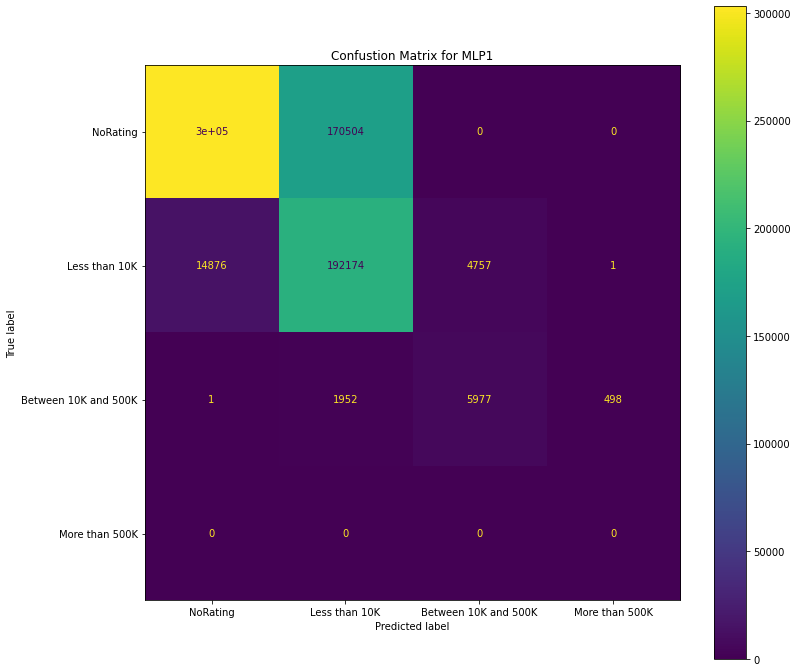

In [59]:
print('Accuracy(test set): %.3f' % clf1.score(X_test, y_test))
print('Accuracy (standardised test set): %.3f' % clf1.score(X_test_std, y_test))
cm = confusion_matrix(clf_predict1,y_test)

cmd = ConfusionMatrixDisplay(cm,display_labels =['NoRating','Less than 10K','Between 10K and 500K','More than 500K'])
fig_3, ax_3 = plt.subplots(figsize=(12,12));
plt.title("Confustion Matrix for MLP1")
cmd.plot(ax=ax_3);

In [60]:
from sklearn.neural_network import MLPClassifier
clf2 = MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(10,), max_iter=300)
clf2.fit(X_train, y_train)
clf_predict2 = clf2.predict(X_test)
# Accuracy factors
print('acc for training data: {:.3f}'.format(clf2.score(X_train, y_train)))
print('acc for test data: {:.3f}'.format(clf2.score(X_test, y_test)))
print('MLP Classification report:\n\n', classification_report(y_test, clf_predict2))

acc for training data: 0.732
acc for test data: 0.731
MLP Classification report:

               precision    recall  f1-score   support

           0       0.65      0.96      0.77    317929
           1       0.93      0.53      0.67    364630
           2       0.70      0.63      0.67     10734
           3       0.68      0.50      0.58       499

    accuracy                           0.73    693792
   macro avg       0.74      0.66      0.67    693792
weighted avg       0.79      0.73      0.72    693792



Accuracy(test set): 0.731


c:\users\krishna sai\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Accuracy (standardised test set): 0.548


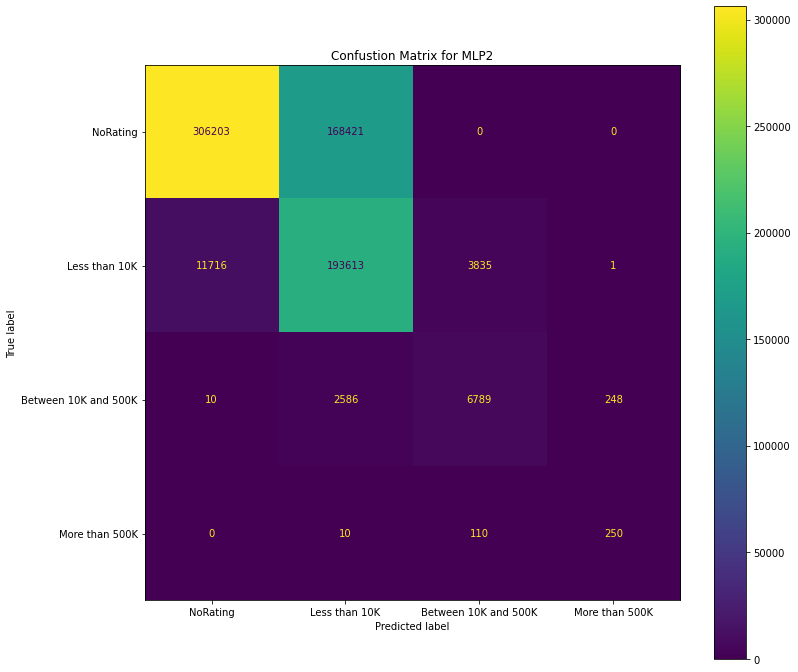

In [61]:
print('Accuracy(test set): %.3f' % clf2.score(X_test, y_test))
print('Accuracy (standardised test set): %.3f' % clf2.score(X_test_std, y_test))
cm = confusion_matrix(clf_predict2,y_test)

cmd = ConfusionMatrixDisplay(cm,display_labels =['NoRating','Less than 10K','Between 10K and 500K','More than 500K'])
fig_5, ax_5 = plt.subplots(figsize=(12,12));
plt.title("Confustion Matrix for MLP2")
cmd.plot(ax=ax_5);

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
models = []
models.append(('RF', rf_model))
models.append(('GB', gb_model))
models.append(('XGB', model))
models.append(('PPN', ppn))
models.append(('MLP1', clf1))
models.append(('MLP2', clf2))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=None)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms

RF: 0.843223 (0.000818)
GB: 0.834651 (0.000606)


c:\users\krishna sai\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:41:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\krishna sai\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\krishna sai\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:46:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\krishna sai\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:48:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\krishna sai\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:50:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\krishna sai\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:53:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\krishna sai\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:55:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\krishna sai\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:57:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\krishna sai\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:59:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\krishna sai\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:02:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB: 0.843680 (0.000906)
PPN: 0.526140 (0.022786)


c:\users\krishna sai\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\krishna sai\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\krishna sai\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\krishna sai\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) 

MLP1: 0.717760 (0.018132)


c:\users\krishna sai\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\krishna sai\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\krishna sai\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\krishna sai\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) 

MLP2: 0.738658 (0.012231)


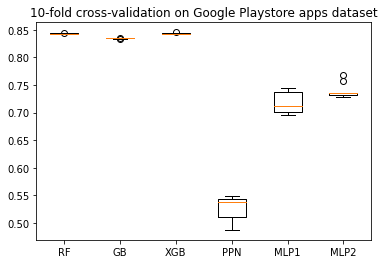

In [63]:
from matplotlib import pyplot
pyplot.boxplot(results, labels=names)
pyplot.title('10-fold cross-validation on Google Playstore apps dataset')
pyplot.show()